## Kaggle Competition "Link Prediction"

In [14]:
import csv
from tqdm import tqdm

import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import itertools
import random
import pylab
import operator
import copy

### Importing the Graph
https://towardsdatascience.com/from-csv-to-github-pages-in-5-steps-publishing-an-interactive-social-network-of-the-marvel-7b8374bf44fb

In [15]:
G= nx.Graph() #G = nx.DiGraph()

In [16]:
G = nx.read_gexf('social_network_training_1.gexf')

In [17]:
G_nodes = G.number_of_nodes()
G_edges = G.number_of_edges()
print("Nodes = ", G_nodes, "// Edges = ",G_edges)

Nodes =  1133 // Edges =  4451


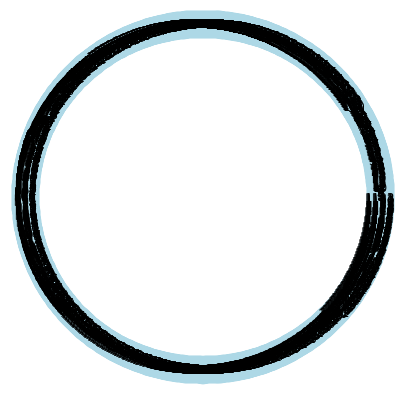

In [18]:
#G.add_edges_from(new_edges)
#nx.set_node_attributes(G, partitions, name='group')

pos=nx.circular_layout(G)
#pos=nx.layout.kamada_kawai_layout(G)
plt.figure(figsize=(7,7))
nx.draw_networkx_nodes(G, pos, node_size= 700, node_color='lightblue')
#nx.draw(G,pos=pos, with_labels=True, node_color='r',alpha=0.5)
nx.draw_networkx_labels(G, pos)

plt.axis('off')
plt.show()

In [19]:
#Number of new edges that have to be added: 
NN = 1000


## Link prediction: Designing Algorithms from Network Science or Machine Learning

In [26]:
def newEdges(list):
    #for loop first NN (=1000) entries list: add node. 
    new_edges = []

    for i in range(0, NN): 
        new_edges.append((list[i][0], list[i][1]))
    
    return new_edges

In [27]:
def newGraph(graph, new_edges):
    graph.add_edges_from(new_edges)
    #nx.set_node_attributes(G, partitions, name='group')

    pos=nx.circular_layout(graph)
    #pos=nx.layout.kamada_kawai_layout(H)
    plt.figure(figsize=(5,5))
    nx.draw_networkx_nodes(graph, pos, node_size= 700, node_color='lightblue')
    #nx.draw(G,pos=pos, with_labels=True, node_color='r',alpha=0.5)
    nx.draw_networkx_labels(graph, pos)

    plt.axis('off')
    plt.show()
    Link_graph_nodes = graph.number_of_nodes()
    Link_graph_edges = graph.number_of_edges()
    print("Nodes = ", Link_graph_nodes, "// Edges = ",Link_graph_edges)

### 1- Common Neighbors: 

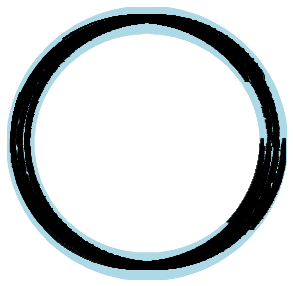

Nodes =  1133 // Edges =  5451


In [28]:
Link_graph = copy.deepcopy(G)
nodes_list = list(G.nodes())
common_neigh = [(nodes_list[0], nodes_list[1], len(list(nx.common_neighbors(G, nodes_list[0], nodes_list[1])))) for nodes_list in nx.non_edges(G)] 
sorted(common_neigh,key=operator.itemgetter(2), reverse = True )

common_edge = newEdges(common_neigh)
newGraph(Link_graph,common_edge)

## 2- Jaccard

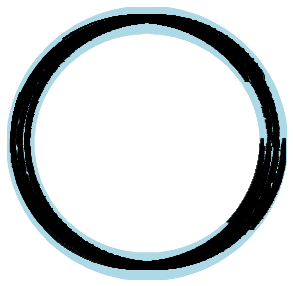

Nodes =  1133 // Edges =  5451


In [30]:
jaccard_graph = copy.deepcopy(G)
jaccard = list(nx.jaccard_coefficient(jaccard_graph))
jaccard.sort(key=operator.itemgetter(2), reverse = True)

jaccard_edge = newEdges(jaccard)
newGraph(jaccard_graph,jaccard_edge)

## 3- Resource Allocation

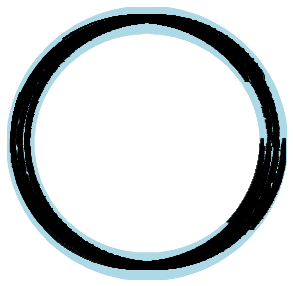

Nodes =  1133 // Edges =  5451


In [31]:
ressouce_graph = copy.deepcopy(G)
resource = list(nx.resource_allocation_index(ressouce_graph))
resource.sort(key=operator.itemgetter(2), reverse = True)

resource_edge = newEdges(resource)
newGraph(ressouce_graph,resource_edge)

## 4- Adamic-Adar Index



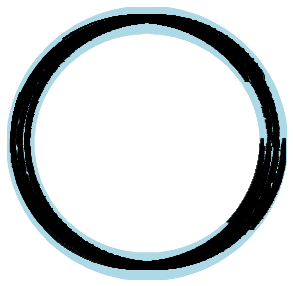

Nodes =  1133 // Edges =  5451


In [33]:
adamic_graph = copy.deepcopy(G)
adamic = list(nx.preferential_attachment(adamic_graph))
adamic.sort(key=operator.itemgetter(2), reverse = True)

adamic_edge = newEdges(adamic)
newGraph(adamic_graph,adamic_edge)

## 5- Preferential Attachment

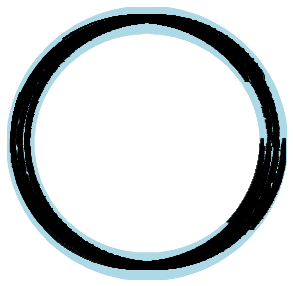

Nodes =  1133 // Edges =  5451


In [32]:
preferential_graph = copy.deepcopy(G)
preferential = list(nx.preferential_attachment(preferential_graph))
preferential.sort(key=operator.itemgetter(2), reverse = True)

preferential_edge = newEdges(preferential)
newGraph(preferential_graph,preferential_edge)